Data
--------

The data is provided by Home Credit, a service dedicated to provided lines of credit (loans) to the unbanked population. Predicting whether or not a client will repay a loan or have difficulty is a critical business need, and Home Credit is hosting this competition on Kaggle to see what sort of models the machine learning community can develop to help them in this task.

There are 7 different sources of data:

*application_train/application_test: the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating 0: the loan was repaid or 1: the loan was not repaid.

*bureau: data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.

*bureau_balance: monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.

*previous_application: previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.

*POS_CASH_BALANCE: monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.

*installments_payment: payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.


Preprocessing
----------
 

To reload the notebook.

In [1]:
%load_ext autoreload
%autoreload 2

We import needed libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import data_processing

Application dataset:

# 1. Read data

In [3]:
path_to="/home/user/Kaggle/data/application_train.csv"
app_train=pd.read_csv(path_to)
path_to="/home/user/Kaggle/data/application_test.csv"
app_test=pd.read_csv(path_to)

Viewing datasets :

In [4]:
app_train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Data train informations :
--------

In [5]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


Resuming data :

In [6]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


Dataset shape :


In [7]:
print("Data train :")
print("(rows number , columns number) = ",app_train.shape)

Data train :
(rows number , columns number) =  (307511, 122)


In [8]:
print("Data test :")
print("(rows number , columns number) = ",app_test.shape)

Data test :
(rows number , columns number) =  (48744, 121)


In [9]:
app_test.head(10)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
7,100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
8,100066,Cash loans,F,N,Y,0,315000.0,364896.0,28957.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
9,100067,Cash loans,F,Y,Y,1,162000.0,45000.0,5337.0,45000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


The column "TARGET" is missing in the test data.

In [10]:
app_train.describe().shape

(8, 106)

Variables types :
--------

In [11]:
print("Number of numerical variables (without TARGET) = ",105)
print("Number of categorical variables = ",121-105)

Number of numerical variables (without TARGET) =  105
Number of categorical variables =  16


Exploring TARGET  variable :
---------------

In [12]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [13]:
paid_target = app_train['TARGET'].value_counts()[0]
unpaid_target = app_train['TARGET'].value_counts()[1]
sum_target = paid_target + unpaid_target
print("percentage of paid target (0) :",round(paid_target/sum_target*100)," %")
print("percentage of unpaid target (1) :",round(unpaid_target/sum_target*100)," %")

percentage of paid target (0) : 92.0  %
percentage of unpaid target (1) : 8.0  %


Text(0.5,1,'TARGET distribution')

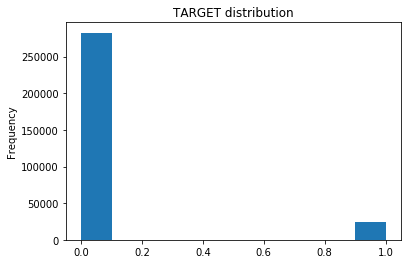

In [14]:
app_train['TARGET'].plot.hist()
plt.title('TARGET distribution')

From the histogram and the percentage, we can see that the classes are extremely unbalanced.<br/>
There are far more loans that were repaid on time than loans that were not repaid.

Missing Values :
------------

In [15]:
mis_val = app_train.isnull().sum()
print("Missing values per variable \n")
mis_val.head()

Missing values per variable 



SK_ID_CURR            0
TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
dtype: int64

Total number of missing values :

In [16]:
sum(mis_val)

9152465

Number of columns containing missing values :

In [17]:
len(mis_val[mis_val!=0])

67

Enumerate variables containing missing values :

In [18]:
mis_val[mis_val!=0].head()

AMT_ANNUITY            12
AMT_GOODS_PRICE       278
NAME_TYPE_SUITE      1292
OWN_CAR_AGE        202929
OCCUPATION_TYPE     96391
dtype: int64

From this information, we see that there are 67 variables containing missing values. However, we can't treat all theses variables because of the high number of missing values in some columns. <br/>
So, we set a tolerence threshold for that of around 10%.

In [19]:
threshold = round(len(app_train.index)/10)
print(threshold)
print("\n Columns containing missing values (more than 10%)")
mis_val[mis_val>threshold].head()

30751

 Columns containing missing values (more than 10%)


OWN_CAR_AGE        202929
OCCUPATION_TYPE     96391
EXT_SOURCE_1       173378
EXT_SOURCE_3        60965
APARTMENTS_AVG     156061
dtype: int64

In [20]:
len(mis_val[mis_val>threshold])

57

We count 57 columns containing a rate of more than 10% of missing values. we are interested to the other variables containing missing values less than 10%

In [21]:
print(" \n Number of variables containing less than 10% of threshold missing values : ",len(mis_val[mis_val!=0][mis_val<threshold]))

 
 Number of variables containing less than 10% of threshold missing values :  10


In [22]:
mis_val[mis_val!=0][mis_val<threshold].index

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

Display the dataset with the columns containing less than 10% missing values :

In [23]:
app_train[mis_val[mis_val!=0][mis_val<threshold].index].head(10)

,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,CNT_FAM_MEMBERS,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,24700.5,351000.0,Unaccompanied,1.0,0.262949,2.0,2.0,2.0,2.0,-1134.0
1,35698.5,1129500.0,Family,2.0,0.622246,1.0,0.0,1.0,0.0,-828.0
2,6750.0,135000.0,Unaccompanied,1.0,0.555912,0.0,0.0,0.0,0.0,-815.0
3,29686.5,297000.0,Unaccompanied,2.0,0.650442,2.0,0.0,2.0,0.0,-617.0
4,21865.5,513000.0,Unaccompanied,1.0,0.322738,0.0,0.0,0.0,0.0,-1106.0
5,27517.5,454500.0,"Spouse, partner",2.0,0.354225,0.0,0.0,0.0,0.0,-2536.0
6,41301.0,1395000.0,Unaccompanied,3.0,0.724000,1.0,0.0,1.0,0.0,-1562.0
7,42075.0,1530000.0,Unaccompanied,2.0,0.714279,2.0,0.0,2.0,0.0,-1070.0
8,33826.5,913500.0,Children,2.0,0.205747,1.0,0.0,1.0,0.0,0.0
9,20250.0,405000.0,Unaccompanied,1.0,0.746644,2.0,0.0,2.0,0.0,-1673.0


In [24]:
app_train[mis_val[mis_val!=0][mis_val<threshold].index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 10 columns):
AMT_ANNUITY                 307499 non-null float64
AMT_GOODS_PRICE             307233 non-null float64
NAME_TYPE_SUITE             306219 non-null object
CNT_FAM_MEMBERS             307509 non-null float64
EXT_SOURCE_2                306851 non-null float64
OBS_30_CNT_SOCIAL_CIRCLE    306490 non-null float64
DEF_30_CNT_SOCIAL_CIRCLE    306490 non-null float64
OBS_60_CNT_SOCIAL_CIRCLE    306490 non-null float64
DEF_60_CNT_SOCIAL_CIRCLE    306490 non-null float64
DAYS_LAST_PHONE_CHANGE      307510 non-null float64
dtypes: float64(9), object(1)
memory usage: 23.5+ MB


We count only one object variable (NAME_TYPE_SUITE) and 9 numeric variable containing less than 10% missing values.

In [25]:
print("Number of missing values in the object variable = ",app_train['NAME_TYPE_SUITE'].isnull().sum())

Number of missing values in the object variable =  1292


In [26]:
print(" \n Display levels of the categorical variable : \n ")
app_train['NAME_TYPE_SUITE'].value_counts(dropna=False)

 
 Display levels of the categorical variable : 
 


Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [27]:
(app_train[mis_val[mis_val!=0][mis_val<threshold].index].describe())

,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
count,307499.000000,3.072330e+05,307509.000000,3.068510e+05,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000
mean,27108.573909,5.383962e+05,2.152665,5.143927e-01,1.422245,0.143421,1.405292,0.100049,-962.858788
std,14493.737315,3.694465e+05,0.910682,1.910602e-01,2.400989,0.446698,2.379803,0.362291,826.808487
min,1615.500000,4.050000e+04,1.000000,8.173617e-08,0.000000,0.000000,0.000000,0.000000,-4292.000000
25%,16524.000000,2.385000e+05,2.000000,3.924574e-01,0.000000,0.000000,0.000000,0.000000,-1570.000000
50%,24903.000000,4.500000e+05,2.000000,5.659614e-01,0.000000,0.000000,0.000000,0.000000,-757.000000
75%,34596.000000,6.795000e+05,3.000000,6.636171e-01,2.000000,0.000000,2.000000,0.000000,-274.000000
max,258025.500000,4.050000e+06,20.000000,8.549997e-01,348.000000,34.000000,344.000000,24.000000,0.000000


Add misising_value as a modality in the NAME_TYPE_SUITE variable

In [28]:
NAME_TYPE_SUITE = app_train['NAME_TYPE_SUITE'].fillna("missing_value")
NAME_TYPE_SUITE.value_counts(dropna=False)

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
missing_value        1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Split Dataset into train, val and test

In [29]:
data_mis_val = data_processing.mis_val_treatment(app_train,mis_val,"mean",10)
print(data_mis_val.shape)
data_mis_val.head(10)

(307511, 10)


,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,CNT_FAM_MEMBERS,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,24700.5,351000.0,Unaccompanied,1.0,0.262949,2.0,2.0,2.0,2.0,-1134.0
1,35698.5,1129500.0,Family,2.0,0.622246,1.0,0.0,1.0,0.0,-828.0
2,6750.0,135000.0,Unaccompanied,1.0,0.555912,0.0,0.0,0.0,0.0,-815.0
3,29686.5,297000.0,Unaccompanied,2.0,0.650442,2.0,0.0,2.0,0.0,-617.0
4,21865.5,513000.0,Unaccompanied,1.0,0.322738,0.0,0.0,0.0,0.0,-1106.0
5,27517.5,454500.0,"Spouse, partner",2.0,0.354225,0.0,0.0,0.0,0.0,-2536.0
6,41301.0,1395000.0,Unaccompanied,3.0,0.724000,1.0,0.0,1.0,0.0,-1562.0
7,42075.0,1530000.0,Unaccompanied,2.0,0.714279,2.0,0.0,2.0,0.0,-1070.0
8,33826.5,913500.0,Children,2.0,0.205747,1.0,0.0,1.0,0.0,0.0
9,20250.0,405000.0,Unaccompanied,1.0,0.746644,2.0,0.0,2.0,0.0,-1673.0


Dataset model construction :

In [30]:
data_model = data_processing.data_model_constuct(app_train,data_mis_val,mis_val)

Split Data

In [31]:
dict = data_processing.train_val_size(data_model,0.2,0.2)

Export datasets :

In [32]:
data_processing.data_export(dict)

Check results :

In [33]:
print(dict['data_train'].shape)
print(dict['data_val'].shape)
print(dict['data_test'].shape)

(184506, 160)
(61502, 160)
(61503, 160)


In [34]:
dict["data_train"].head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,...,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_missing_value
156301,281180,1,225000.0,450000.0,0.006296,-15191,-1658,-2141.0,-4796,1,...,0,0,0,0,0,0,0,0,1,0
238385,376066,2,121500.0,247275.0,0.019689,-10669,-1722,-1676.0,-3347,1,...,0,0,0,0,0,0,0,0,1,0
203424,335832,0,135000.0,910890.0,0.030755,-16828,-4779,-799.0,-372,1,...,0,0,0,0,0,0,0,0,1,0
126656,246890,1,67500.0,170640.0,0.018634,-13674,-712,-3633.0,-5536,1,...,0,0,0,0,0,0,0,0,1,0
3300,103858,0,238500.0,760225.5,0.025164,-17581,-2066,-10111.0,-1132,1,...,0,0,0,1,0,0,0,0,0,0
